In [1]:
from CellClass import MCImage
from CellClass import imread
from CellClass import Preprocessing as pp
from CellClass.Segment import Segmentation
import numpy as np
import matplotlib.pyplot as plt

2022-06-02 15:06:55.369662: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon_g/anaconda3/envs/CellClass/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-02 15:06:55.369690: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
img = imread("/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/processed/S4_200.tif")
print(img.shape)
MCIm = MCImage(img, scheme="BGR")
MCIm.normalize()

S = Segmentation()

(1496, 2048, 3)


2022-06-02 15:06:59.593949: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon_g/anaconda3/envs/CellClass/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-02 15:06:59.594066: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon_g/anaconda3/envs/CellClass/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-02 15:06:59.594165: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon_g/anaconda3/envs/CellClass/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-

In [3]:
im, res, outline = S(MCIm.B, return_outline=True)
print(im.shape, res.shape, outline.shape)

/home/simon_g/anaconda3/envs/CellClass/lib/python3.9/site-packages/deepcell_toolbox/deep_watershed.py:179: FutureWarning: `selem` is a deprecated argument name for `h_maxima`. It will be removed in version 1.0. Please use `footprint` instead.
  markers = h_maxima(image=maxima,


(1496, 2048) (1496, 2048) (1496, 2048, 3)


In [4]:
from CellClass import process_masks as pm
import importlib
importlib.reload(pm)

patches = pm.get_cell_patches(MCIm.B, res)

100%|██████████| 594/594 [00:00<00:00, 11504.03it/s]


(594, 64, 64)


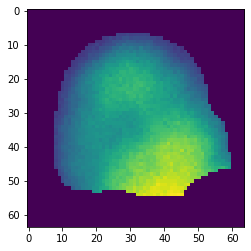

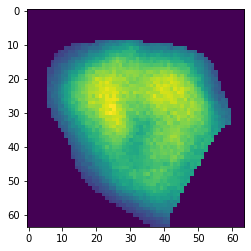

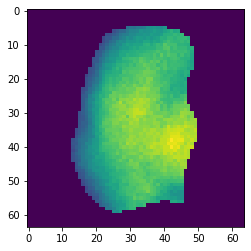

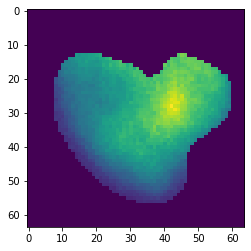

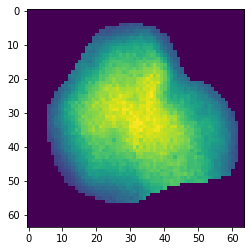

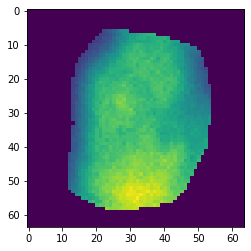

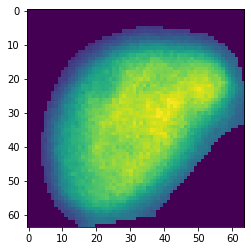

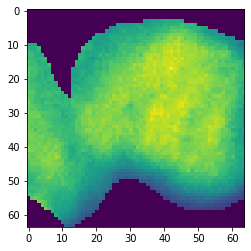

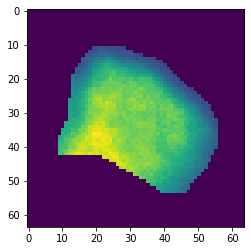

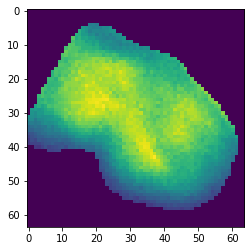

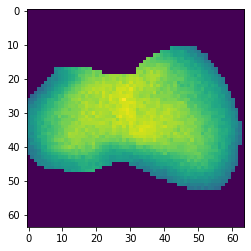

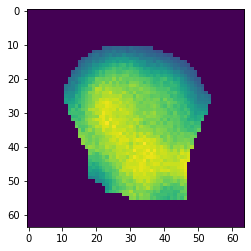

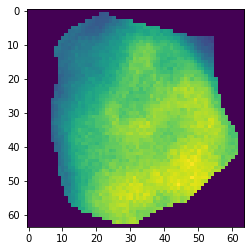

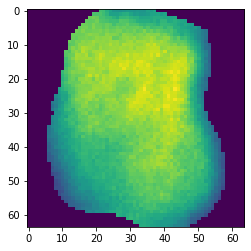

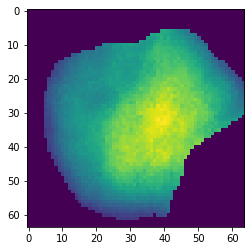

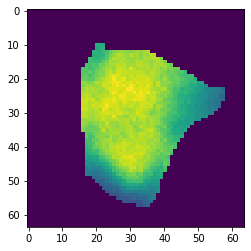

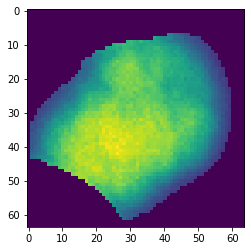

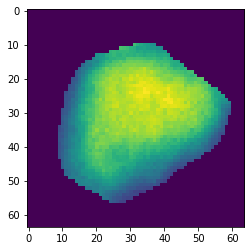

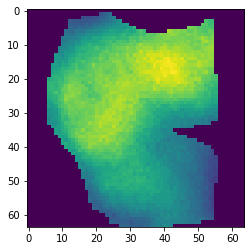

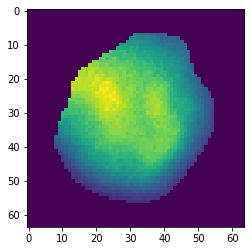

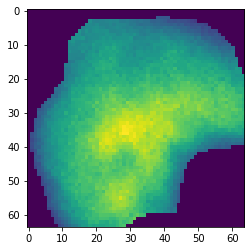

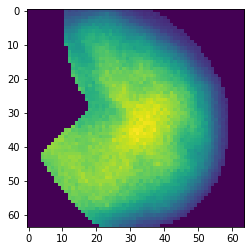

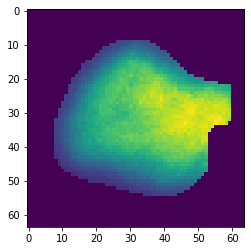

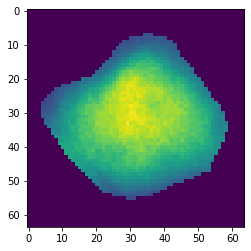

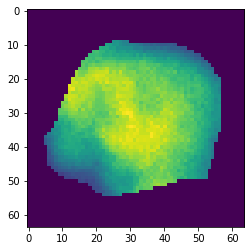

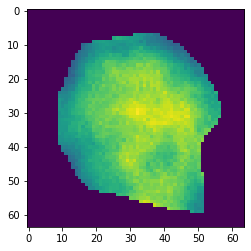

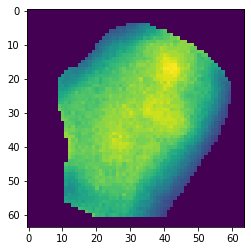

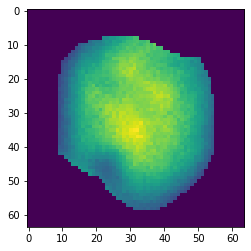

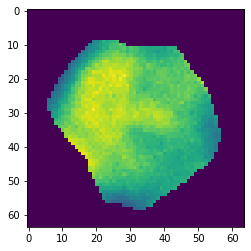

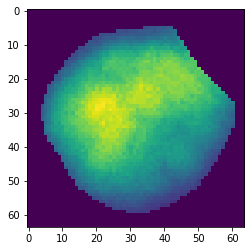

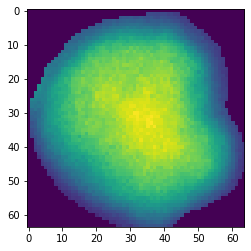

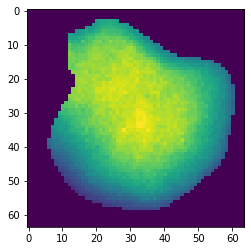

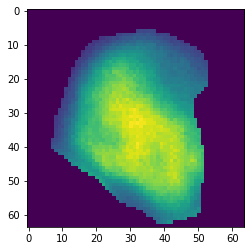

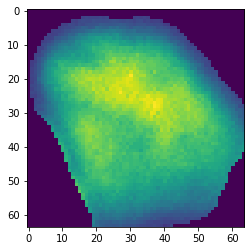

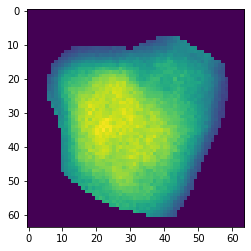

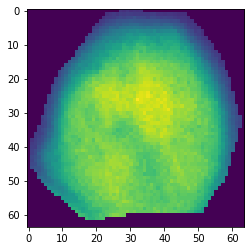

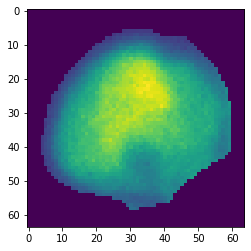

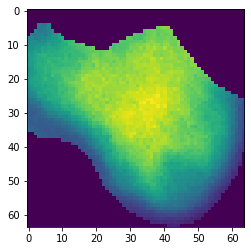

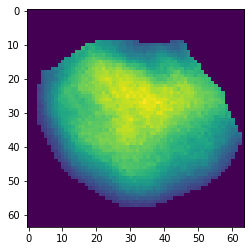

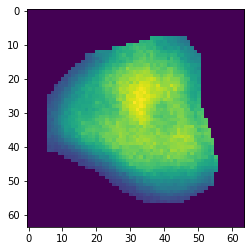

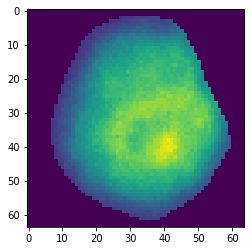

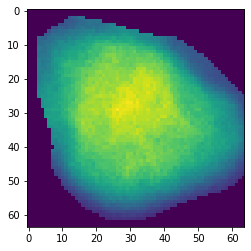

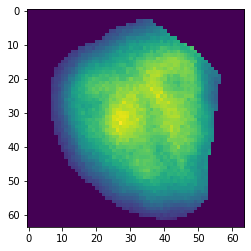

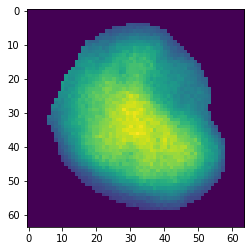

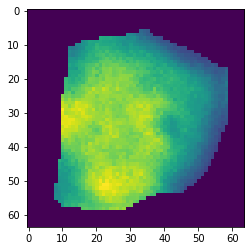

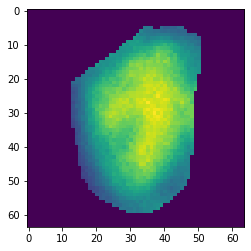

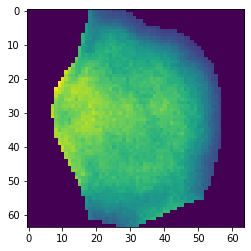

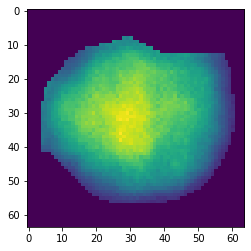

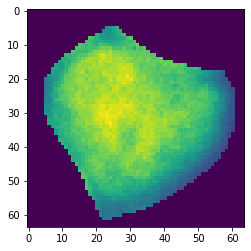

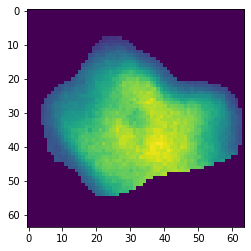

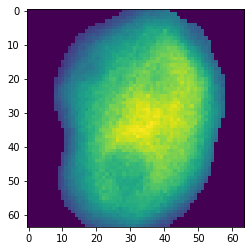

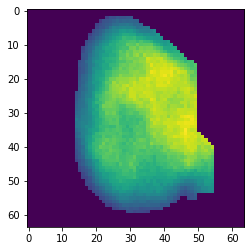

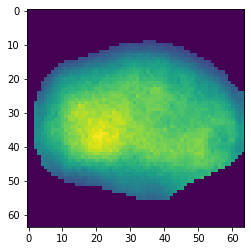

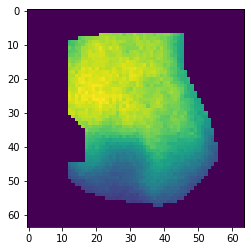

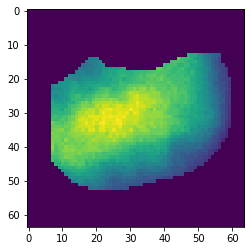

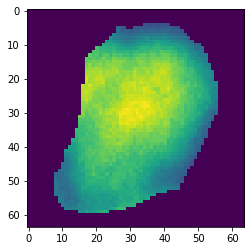

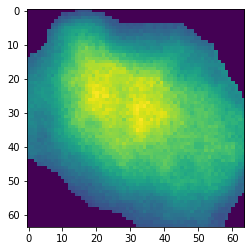

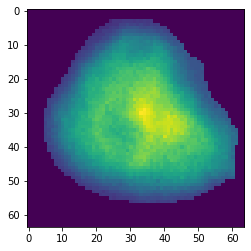

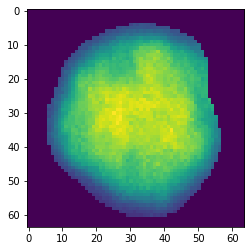

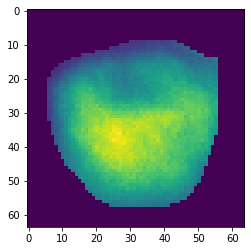

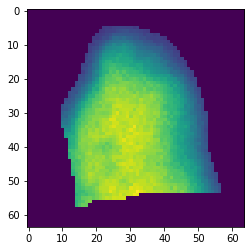

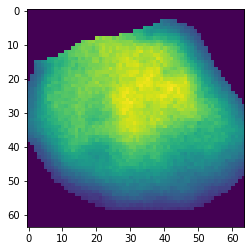

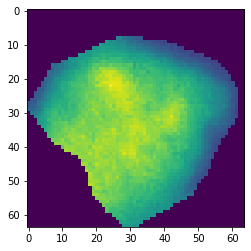

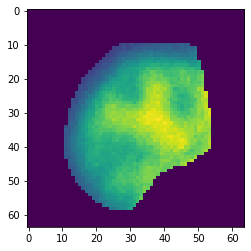

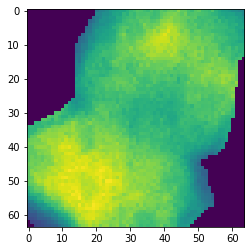

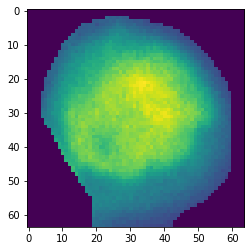

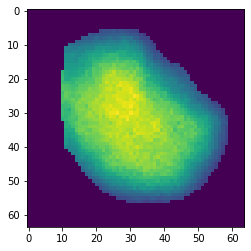

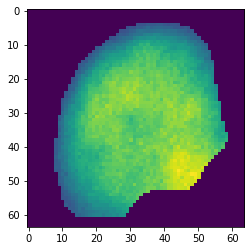

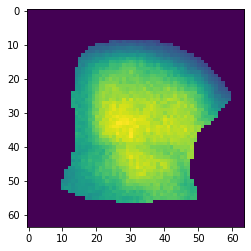

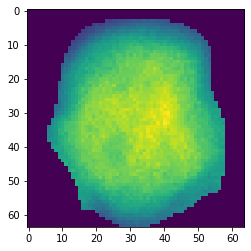

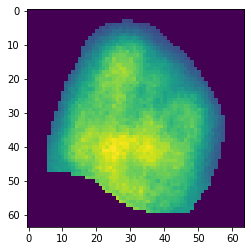

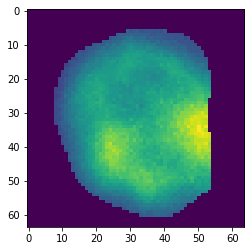

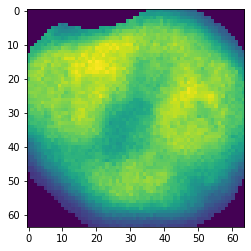

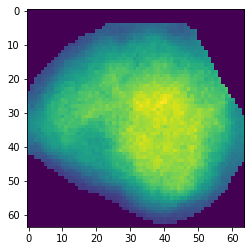

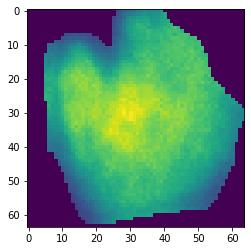

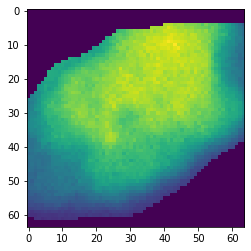

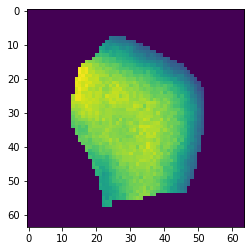

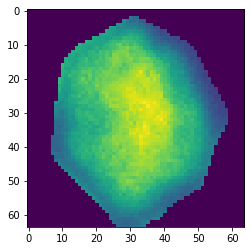

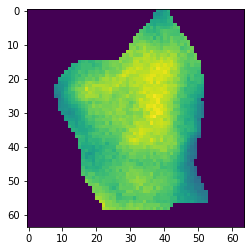

KeyboardInterrupt: 

In [5]:
print(patches.shape)
for p in patches:
    plt.imshow(p);plt.show()